## 팀과제

- feature : pclass, sex, fare
- label : survived
    
1. 1등급, female, 32달러 인 경우 생사유무를 예측하시오(voting, bagging, boost, deep learning)
2. 위의 모델의 train, test, f1 score를 구하시오
3. confusion matrix 를 구하고 heatmap을 그리시오
4. roc curve를 그리시오

## voting

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer, load_wine, make_classification, load_iris, fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer


from xgboost import XGBClassifier
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')

x_data = titanic[['pclass', 'sex', 'fare']]
y_data = titanic[['survived']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, stratify = y_data, random_state = 1)

In [3]:
mct = make_column_transformer(  ( OneHotEncoder(), ['sex'] ), remainder = 'passthrough' )
model_logi = make_pipeline( mct, StandardScaler(), LogisticRegression() )
model_knn = make_pipeline( mct, StandardScaler(), KNeighborsClassifier() )
model_tree = make_pipeline( mct, StandardScaler(), DecisionTreeClassifier() )

In [4]:
model_vote = VotingClassifier(estimators = [('logi', model_logi), ('knn', model_knn), ('tree', model_tree)], voting = 'soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('logi',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('onehotencoder',
                                                                                OneHotEncoder(),
                                                                                ['sex'])])),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('knn',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                 

In [5]:
q1 = pd.DataFrame([1, 'female', 32]).T
q1.columns = x_data.columns

print('1등급, female, 32달러인 사람의 voting 생존여부는', model_vote.predict(q1)[0],'로 생존할 가능성이 크다.')

1등급, female, 32달러인 사람의 voting 생존여부는 1 로 생존할 가능성이 크다.


In [6]:
## 2. train, test, f1 score
print('voting train f1 score : ', metrics.f1_score(y_train, model_vote.predict(x_train), average='macro'))
print('voting test f1 score : ', metrics.f1_score(y_test, model_vote.predict(x_test), average='macro'))

voting train f1 score :  0.8825092827828805
voting test f1 score :  0.8158146409320117


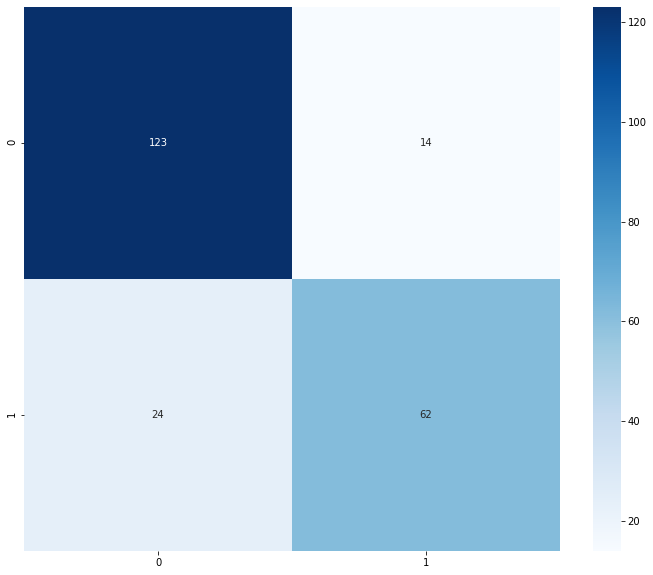

In [7]:
## 3. confusion matrix, heatmap
cm = confusion_matrix(y_test, model_vote.predict(x_test))
plt.figure(figsize = (12, 10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt='d')
plt.show()

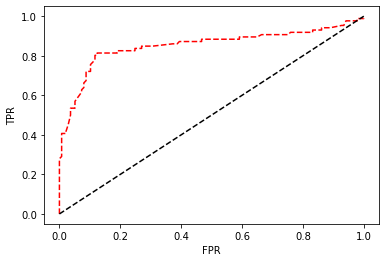

In [11]:
## 4. roc_curve
from sklearn.metrics import roc_curve
p = model_vote.predict_proba(x_test)
y_test_cp = y_test.copy()
df = pd.DataFrame( y_test_cp )
df['proba'] = p[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.values, df['proba'])
plt.plot(fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [13]:
df['proba']

391    0.032269
584    0.132301
610    0.331609
261    0.033122
496    0.971101
         ...   
434    0.745025
331    0.208945
559    0.396906
376    0.862568
47     0.712618
Name: proba, Length: 223, dtype: float64

1등급, female, 32달러인 사람의 voting 생존여부는 1 로 생존할 가능성이 크다.
bagging train f1 score :  0.8989082261377148
bagging test f1 score :  0.8098891730605285


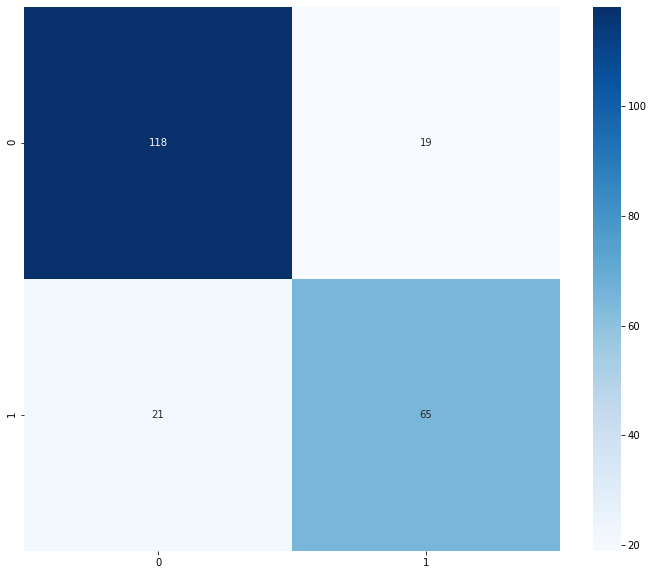

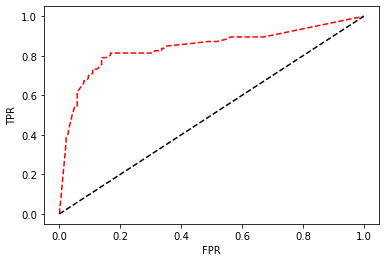

In [21]:
from sklearn.ensemble import BaggingClassifier

mct = make_column_transformer(  ( OneHotEncoder(), ['sex'] ), remainder = 'passthrough' )
model_bagg = make_pipeline( mct, StandardScaler(), BaggingClassifier() )
model_bagg.fit(x_train, y_train)

q1 = pd.DataFrame([1, 'female', 32]).T
q1.columns = x_data.columns

print('1등급, female, 32달러인 사람의 voting 생존여부는', model_bagg.predict(q1)[0],'로 생존할 가능성이 크다.')

## 2. train, test, f1 score
print('bagging train f1 score : ', metrics.f1_score(y_train, model_bagg.predict(x_train), average='macro'))
print('bagging test f1 score : ', metrics.f1_score(y_test, model_bagg.predict(x_test), average='macro'))

## 3. confusion matrix, heatmap
cm = confusion_matrix(y_test, model_bagg.predict(x_test))
plt.figure(figsize = (12, 10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt='d')
plt.show()

## 4. roc_curve
from sklearn.metrics import roc_curve
p = model_bagg.predict_proba(x_test)
y_test_cp = y_test.copy()
df = pd.DataFrame( y_test_cp )
df['proba'] = p[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.values, df['proba'])
plt.plot(fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()